In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVR,SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [2]:
data = pd.read_csv('forestfires.csv')

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
data.drop(data.columns[11:30],1,inplace= True)

In [8]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [9]:
data.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [10]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

data['month']= data['month'].str.capitalize()

data.month.value_counts()

Aug    184
Sep    172
Mar     54
Jul     32
Feb     20
Jun     17
Oct     15
Dec      9
Apr      9
May      2
Jan      2
Nov      1
Name: month, dtype: int64

In [11]:
data['month'] = data['month'].map({"Jan":0, "Feb":1, "Mar":2, "Apr":3, "May":4, "Jun":5, 
          "Jul":6, "Aug":7, "Sep":8, "Oct":9, "Nov":10, "Dec":11})

In [12]:
days = data.day.unique()

In [13]:
data['day'] = data['day'].map({'mon':0,'tue':1,'wed':2,'thu':3,'fri':4,'sat':5,'sun':6})

In [14]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [15]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [16]:
data['size_category'] = LabelEncoder().fit_transform(data['size_category'])

In [17]:
data.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1
5,7,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,1
6,7,0,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,1
7,7,0,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,1
8,8,1,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,1
9,8,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,1


In [18]:
ss = StandardScaler().fit_transform(data.drop('size_category',1))

In [19]:
forest = pd.DataFrame(ss,columns = data.columns[:-1])

In [20]:
forest['category'] = data.size_category

In [21]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,1
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,1
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,1
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,1
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,0
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,0
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,0
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,1


In [22]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     517 non-null    float64
 1   day       517 non-null    float64
 2   FFMC      517 non-null    float64
 3   DMC       517 non-null    float64
 4   DC        517 non-null    float64
 5   ISI       517 non-null    float64
 6   temp      517 non-null    float64
 7   RH        517 non-null    float64
 8   wind      517 non-null    float64
 9   rain      517 non-null    float64
 10  area      517 non-null    float64
 11  category  517 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 48.6 KB


In [23]:
#sns.pairplot(data=forest)

plt.show()

In [24]:
xTrain,xTest, yTrain,yTest = train_test_split(forest.drop('category',1),forest.category,test_size=0.2)

In [25]:
smote = SMOTE(k_neighbors=3)

In [26]:
xTrain,yTrain = smote.fit_sample(xTrain,yTrain)

In [27]:
svm = SVR()

In [28]:
svm = svm.fit(xTrain,yTrain)

In [29]:
svm.score(xTest,yTest)

0.26798709845252366

In [30]:
svm.score(xTrain,yTrain)

0.6717903889627567

In [31]:
pred = svm.predict(xTest)
#print(accuracy_score(yTest,pred))

In [32]:
pred

array([ 7.09519124e-01,  6.81844398e-01,  1.05264292e+00,  6.74033232e-01,
        9.96831650e-01,  4.02024085e-01,  4.21687260e-01,  7.16352139e-01,
        8.69322284e-01,  9.29032804e-01,  7.23763809e-01,  5.42759956e-01,
        6.54785109e-01,  6.18841737e-01,  6.19737464e-01,  7.60426787e-01,
        7.02544072e-01, -5.24663295e-01,  8.68619298e-01,  9.59273259e-01,
        8.48678764e-01,  1.13563650e+00,  8.34602374e-01,  6.85520267e-01,
        8.20752659e-01,  4.62329863e-01,  1.26407492e-01,  7.83136483e-01,
        1.04622158e+00,  8.81744615e-01,  7.87192292e-01,  8.95903147e-01,
        5.45716978e-01, -3.92507013e-01,  6.67310523e-01,  4.04810984e-01,
        5.97067463e-01,  1.07574689e+00,  6.82714782e-01,  9.89582184e-01,
        8.21158224e-01,  7.25862832e-01,  6.50109312e-01,  4.53913519e-01,
        3.71235682e-01,  7.19911947e-01,  1.02892366e-01,  6.92357756e-01,
        1.15272331e-01,  6.80635881e-01,  9.48927749e-01,  8.97606109e-01,
       -1.14276149e-01,  

In [33]:
confusion_matrix(yTest,pred.round())

array([[ 0,  0,  0],
       [ 1, 17,  6],
       [ 0,  8, 72]])

In [34]:
accuracy_score(yTest,pred.round())

0.8557692307692307

In [35]:
svc = SVC()
svc = svc.fit(xTrain,yTrain)

In [36]:
yPred = svc.predict(xTest)

In [37]:
confusion_matrix(yTest,yPred)

array([[16,  8],
       [ 6, 74]])

In [38]:
accuracy_score(yTest,yPred)

0.8653846153846154

In [39]:
cor = forest.drop('category',1).corr()

In [40]:
correlated_features = list()
for x in range(len(cor.columns)):
    for j in range(x):
        if(abs(cor.iloc[x,j]))>0.5:
            colname = cor.columns[x]
            correlated_features.append(colname)
            

In [41]:
correlated_features= list(set(correlated_features))
print(correlated_features)

['DC', 'RH', 'ISI']


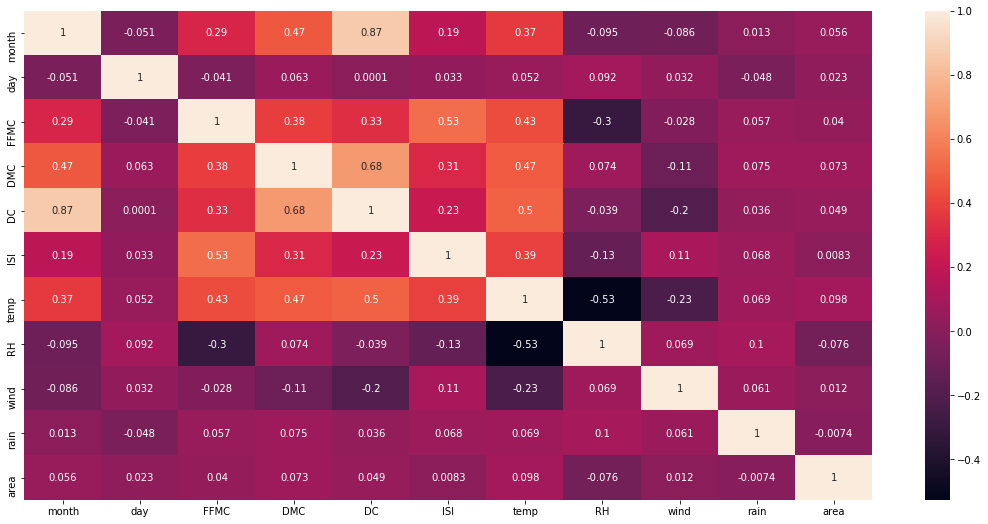

In [42]:
plt.figure(figsize=(19,9))
sns.heatmap(data=cor,annot= True)

plt.show()

In [43]:
forest.drop(correlated_features,1)

,month,day,FFMC,DMC,temp,wind,rain,area,category
0,-1.968443,0.357721,-0.805959,-1.323326,-1.842640,1.498614,-0.073268,-0.202020,1
1,1.110120,-1.090909,-0.008102,-1.179541,-0.153278,-1.741756,-0.073268,-0.202020,1
2,1.110120,0.840597,-0.008102,-1.049822,-0.739383,-1.518282,-0.073268,-0.202020,1
3,-1.968443,0.357721,0.191362,-1.212361,-1.825402,-0.009834,0.603155,-0.202020,1
4,-1.968443,1.323474,-0.243833,-0.931043,-1.291012,-1.238940,-0.073268,-0.202020,1
...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,1.536084,-0.736124,-0.073268,-0.100753,0
513,0.230531,1.323474,-1.640083,-0.846648,0.519019,0.995798,-0.073268,0.651674,0
514,0.230531,1.323474,-1.640083,-0.846648,0.398350,1.498614,-0.073268,-0.026532,0
515,0.230531,0.840597,0.680957,0.549003,1.156839,-0.009834,-0.073268,-0.202020,1


In [47]:
rf = RandomForestClassifier(n_estimators=100)

In [55]:
ref = RFECV(estimator=rf,step = 1, cv=StratifiedKFold(10), scoring='accuracy')

In [56]:
ref.fit(xTrain,yTrain)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [57]:
ref.estimator_.feature_importances_

array([1.])

In [58]:
ref.n_features_

1

In [60]:
print(np.where(ref.support_ == False)[0])

[0 1 2 3 4 5 6 7 8 9]


In [61]:
ref.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True])

In [62]:
# the REF says that only one feature is required 
# so we drop the REF here and continue with the SVM only